## Persistency of Drug

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [93]:
df = pd.read_excel('Healthcare_dataset.xlsx', sheet_name='Dataset')

In [94]:
df.sample(5)

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
1206,P1207,Persistent,Female,Caucasian,Not Hispanic,South,55-65,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
2847,P2848,Non-Persistent,Female,Other/Unknown,Not Hispanic,Midwest,>75,OBSTETRICS & OBSTETRICS & GYNECOLOGY & OBSTETR...,Specialist,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
2147,P2148,Non-Persistent,Female,Caucasian,Not Hispanic,West,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,Y,N,N,N,N,N,N,2
1922,P1923,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,Unknown,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1
2300,P2301,Non-Persistent,Female,Caucasian,Not Hispanic,West,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,Y,N,Y,N,N,N,N,N,N,2


In [95]:
df.shape

(3424, 69)

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3424 entries, 0 to 3423
Data columns (total 69 columns):
 #   Column                                                              Non-Null Count  Dtype 
---  ------                                                              --------------  ----- 
 0   Ptid                                                                3424 non-null   object
 1   Persistency_Flag                                                    3424 non-null   object
 2   Gender                                                              3424 non-null   object
 3   Race                                                                3424 non-null   object
 4   Ethnicity                                                           3424 non-null   object
 5   Region                                                              3424 non-null   object
 6   Age_Bucket                                                          3424 non-null   object
 7   Ntm_Speciality          

In [97]:
df.duplicated().sum()

np.int64(0)

In [98]:
df.isnull().sum()

Ptid                              0
Persistency_Flag                  0
Gender                            0
Race                              0
Ethnicity                         0
                                 ..
Risk_Hysterectomy_Oophorectomy    0
Risk_Estrogen_Deficiency          0
Risk_Immobilization               0
Risk_Recurring_Falls              0
Count_Of_Risks                    0
Length: 69, dtype: int64

In [99]:
df.corr(numeric_only=True)

,Dexa_Freq_During_Rx,Count_Of_Risks
Dexa_Freq_During_Rx,1.000000,0.013964
Count_Of_Risks,0.013964,1.000000


In [100]:
df.drop(columns=['Ptid'],inplace=True)

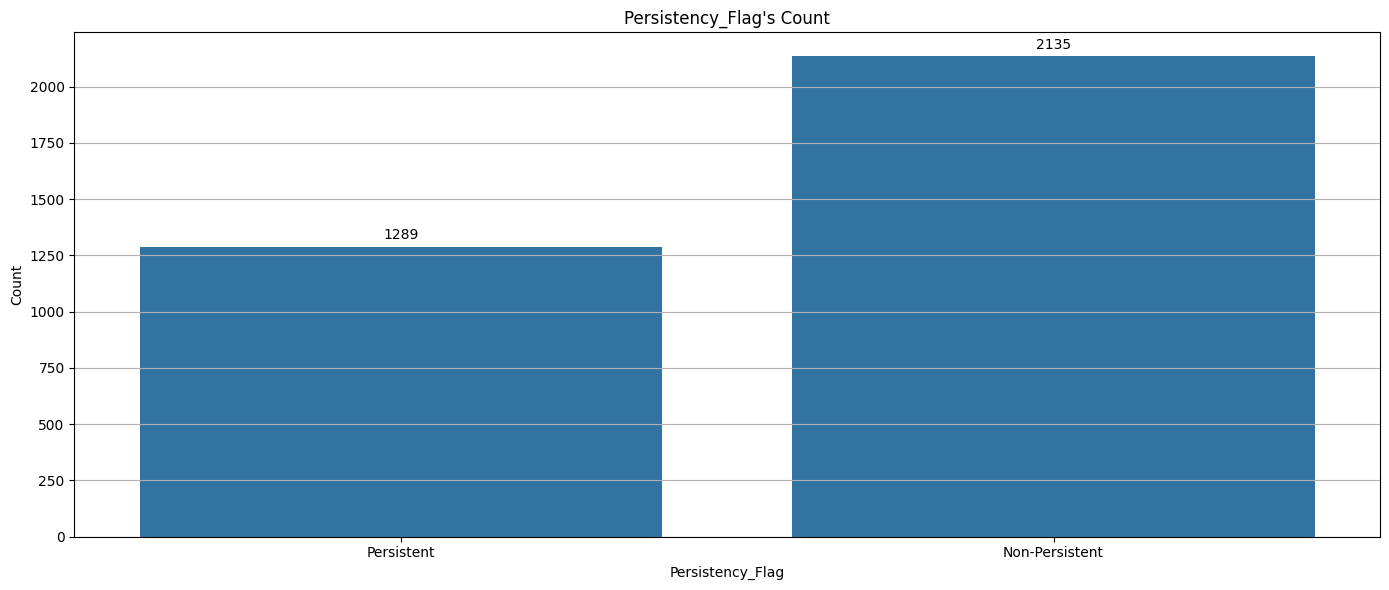

In [101]:
plt.figure(figsize=(14,6))
plt.title("Persistency_Flag's Count")
count = sns.countplot(data=df, x='Persistency_Flag')
plt.ylabel("Count")
plt.grid(axis='y')
plt.xlabel("Persistency_Flag")

for container in count.containers:
    count.bar_label(container, fmt='%.0f',label_type='edge',padding=3)

plt.tight_layout()
plt.show()

### Data Cleaning & Feature Engineering

In [102]:
df.isnull().mean()*100

Persistency_Flag                  0.0
Gender                            0.0
Race                              0.0
Ethnicity                         0.0
Region                            0.0
                                 ... 
Risk_Hysterectomy_Oophorectomy    0.0
Risk_Estrogen_Deficiency          0.0
Risk_Immobilization               0.0
Risk_Recurring_Falls              0.0
Count_Of_Risks                    0.0
Length: 68, dtype: float64

In [103]:
df.describe()

,Dexa_Freq_During_Rx,Count_Of_Risks
count,3424.000000,3424.000000
mean,3.016063,1.239486
std,8.136545,1.094914
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,1.000000
75%,3.000000,2.000000
max,146.000000,7.000000


In [104]:
# Analyze categorical variables
categorical_cols = df.select_dtypes(include=['object']).columns
print("Categorical columns:", categorical_cols.tolist())

print("\nUnique values in categorical columns:")
for col in categorical_cols:
    print(f"{col}: {df[col].unique()}")
    print(f"Number of unique values: {df[col].nunique()}")
    print("\n")

Categorical columns: ['Persistency_Flag', 'Gender', 'Race', 'Ethnicity', 'Region', 'Age_Bucket', 'Ntm_Speciality', 'Ntm_Specialist_Flag', 'Ntm_Speciality_Bucket', 'Gluco_Record_Prior_Ntm', 'Gluco_Record_During_Rx', 'Dexa_During_Rx', 'Frag_Frac_Prior_Ntm', 'Frag_Frac_During_Rx', 'Risk_Segment_Prior_Ntm', 'Tscore_Bucket_Prior_Ntm', 'Risk_Segment_During_Rx', 'Tscore_Bucket_During_Rx', 'Change_T_Score', 'Change_Risk_Segment', 'Adherent_Flag', 'Idn_Indicator', 'Injectable_Experience_During_Rx', 'Comorb_Encounter_For_Screening_For_Malignant_Neoplasms', 'Comorb_Encounter_For_Immunization', 'Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx', 'Comorb_Vitamin_D_Deficiency', 'Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified', 'Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx', 'Comorb_Long_Term_Current_Drug_Therapy', 'Comorb_Dorsalgia', 'Comorb_Personal_History_Of_Other_Diseases_And_Conditions', 'Comorb_Other_Disorders_Of_Bone_Density_And_Structure', 'Comorb_D

#### Feature Engineering Steps

In [105]:
# 1. Encode categorical variables using OneHot Encoder, Label Encoder
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# OneHot Encoding (creates multiple binary columns)
data_processed = df.copy()

# Exclude target variable from encoding
categorical_cols_to_encode = [col for col in categorical_cols if col != 'Persistency_Flag']

for col in categorical_cols_to_encode:
    # Create a new encoder for each column
    encoder = OneHotEncoder(sparse_output=False, drop='first')
    encoded_col = encoder.fit_transform(data_processed[[col]])
    
    # Get feature names correctly based on the number of columns after drop='first'
    feature_names = encoder.get_feature_names_out([col])
    
    encoded_df = pd.DataFrame(encoded_col, columns=feature_names, index=data_processed.index)
    data_processed = pd.concat([data_processed, encoded_df], axis=1)
    data_processed.drop(columns=[col], inplace=True)

print(f"OneHot encoding completed for {len(categorical_cols_to_encode)} columns")
print(f"Data shape after OneHot encoding: {data_processed.shape}")

# # OneHot Encoding
le = LabelEncoder()
data_processed['Persistency_Flag'] = le.fit_transform(data_processed['Persistency_Flag'])


OneHot encoding completed for 65 columns
Data shape after OneHot encoding: (3424, 117)


In [106]:
df

,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,Gluco_Record_Prior_Ntm,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
0,Persistent,Male,Caucasian,Not Hispanic,West,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,...,N,N,N,N,N,N,N,N,N,0
1,Non-Persistent,Male,Asian,Not Hispanic,West,55-65,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,...,N,N,N,N,N,N,N,N,N,0
2,Non-Persistent,Female,Other/Unknown,Hispanic,Midwest,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,...,N,Y,N,N,N,N,N,N,N,2
3,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,...,N,N,N,N,N,N,N,N,N,1
4,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,Y,...,N,N,N,N,N,N,N,N,N,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3419,Persistent,Female,Caucasian,Not Hispanic,South,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,...,N,N,Y,N,N,N,N,N,N,1
3420,Persistent,Female,Caucasian,Not Hispanic,South,>75,Unknown,Others,OB/GYN/Others/PCP/Unknown,N,...,N,N,N,N,N,N,N,N,N,0
3421,Persistent,Female,Caucasian,Not Hispanic,South,>75,ENDOCRINOLOGY,Specialist,Endo/Onc/Uro,N,...,N,N,Y,N,N,N,N,N,N,1
3422,Non-Persistent,Female,Caucasian,Not Hispanic,South,55-65,Unknown,Others,OB/GYN/Others/PCP/Unknown,N,...,N,N,N,N,N,N,N,N,N,0


In [107]:
# Display the Label encoded data
print("Label Encoded Data Shape:", data_processed.shape)
print("\nFirst few rows of Label encoded data:")
data_processed.head()

Label Encoded Data Shape: (3424, 117)

First few rows of Label encoded data:


,Persistency_Flag,Dexa_Freq_During_Rx,Count_Of_Risks,Gender_Male,Race_Asian,Race_Caucasian,Race_Other/Unknown,Ethnicity_Not Hispanic,Ethnicity_Unknown,Region_Northeast,...,Risk_Chronic_Liver_Disease_Y,Risk_Family_History_Of_Osteoporosis_Y,Risk_Low_Calcium_Intake_Y,Risk_Vitamin_D_Insufficiency_Y,Risk_Poor_Health_Frailty_Y,Risk_Excessive_Thinness_Y,Risk_Hysterectomy_Oophorectomy_Y,Risk_Estrogen_Deficiency_Y,Risk_Immobilization_Y,Risk_Recurring_Falls_Y
0,1,0,0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0,2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0,1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [108]:
df

,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,Gluco_Record_Prior_Ntm,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
0,Persistent,Male,Caucasian,Not Hispanic,West,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,...,N,N,N,N,N,N,N,N,N,0
1,Non-Persistent,Male,Asian,Not Hispanic,West,55-65,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,...,N,N,N,N,N,N,N,N,N,0
2,Non-Persistent,Female,Other/Unknown,Hispanic,Midwest,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,...,N,Y,N,N,N,N,N,N,N,2
3,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,...,N,N,N,N,N,N,N,N,N,1
4,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,Y,...,N,N,N,N,N,N,N,N,N,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3419,Persistent,Female,Caucasian,Not Hispanic,South,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,...,N,N,Y,N,N,N,N,N,N,1
3420,Persistent,Female,Caucasian,Not Hispanic,South,>75,Unknown,Others,OB/GYN/Others/PCP/Unknown,N,...,N,N,N,N,N,N,N,N,N,0
3421,Persistent,Female,Caucasian,Not Hispanic,South,>75,ENDOCRINOLOGY,Specialist,Endo/Onc/Uro,N,...,N,N,Y,N,N,N,N,N,N,1
3422,Non-Persistent,Female,Caucasian,Not Hispanic,South,55-65,Unknown,Others,OB/GYN/Others/PCP/Unknown,N,...,N,N,N,N,N,N,N,N,N,0


In [112]:
# 3. Create risk score features from risk-related columns
# Filter only binary risk columns (Y/N format) from original dataframe
binary_risk_columns = [col for col in df.columns if 'Risk_' in col and 
                      df[col].dtype == 'object' and 
                      set(df[col].unique()).issubset({'Y', 'N'})]

print(f"Found {len(binary_risk_columns)} binary risk columns:")
print(binary_risk_columns[:10])  # Show first 10

if binary_risk_columns:
    # Convert Y/N to 1/0 for binary risk columns in data_processed
    for col in binary_risk_columns:
        # First add the original column to data_processed if not already there
        if col not in data_processed.columns:
            data_processed[col] = df[col]
        # Create numeric version
        data_processed[col + '_numeric'] = data_processed[col].map({'Y': 1, 'N': 0})
        data_processed.drop(columns=[col], inplace=True)

    # Calculate total risk score using numeric columns
    numeric_risk_cols = [col + '_numeric' for col in binary_risk_columns]
    data_processed['Total_Risk_Score'] = data_processed[numeric_risk_cols].sum(axis=1)
    
    # Create risk categories
    data_processed['Risk_Category'] = pd.cut(data_processed['Total_Risk_Score'], 
                                         bins=[-1, 0, 2, 5, float('inf')], 
                                         labels=['No_Risk', 'Low_Risk', 'Medium_Risk', 'High_Risk'])
    
    print(f"\nRisk score distribution:")
    print(data_processed['Total_Risk_Score'].describe())
    print(f"\nRisk category distribution:")
    print(data_processed['Risk_Category'].value_counts())

Found 19 binary risk columns:
['Risk_Type_1_Insulin_Dependent_Diabetes', 'Risk_Osteogenesis_Imperfecta', 'Risk_Rheumatoid_Arthritis', 'Risk_Untreated_Chronic_Hyperthyroidism', 'Risk_Untreated_Chronic_Hypogonadism', 'Risk_Untreated_Early_Menopause', 'Risk_Patient_Parent_Fractured_Their_Hip', 'Risk_Smoking_Tobacco', 'Risk_Chronic_Malnutrition_Or_Malabsorption', 'Risk_Chronic_Liver_Disease']

Risk score distribution:
count    3424.000000
mean        1.239486
std         1.094914
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         7.000000
Name: Total_Risk_Score, dtype: float64

Risk category distribution:
Risk_Category
Low_Risk       2023
No_Risk         970
Medium_Risk     423
High_Risk         8
Name: count, dtype: int64


In [113]:
data_processed

,Persistency_Flag,Dexa_Freq_During_Rx,Count_Of_Risks,Gender_Male,Race_Asian,Race_Caucasian,Race_Other/Unknown,Ethnicity_Not Hispanic,Ethnicity_Unknown,Region_Northeast,...,Risk_Low_Calcium_Intake_numeric,Risk_Vitamin_D_Insufficiency_numeric,Risk_Poor_Health_Frailty_numeric,Risk_Excessive_Thinness_numeric,Risk_Hysterectomy_Oophorectomy_numeric,Risk_Estrogen_Deficiency_numeric,Risk_Immobilization_numeric,Risk_Recurring_Falls_numeric,Total_Risk_Score,Risk_Category
0,1,0,0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,No_Risk
1,0,0,0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,No_Risk
2,0,0,2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1,0,0,0,0,0,0,0,2,Low_Risk
3,0,0,1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,Low_Risk
4,0,0,1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,Low_Risk
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3419,1,0,1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0,1,0,0,0,0,0,0,1,Low_Risk
3420,1,0,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,No_Risk
3421,1,7,1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0,1,0,0,0,0,0,0,1,Low_Risk
3422,0,0,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,No_Risk


In [114]:
# 5. Feature scaling and normalization
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Identify numerical columns for scaling
numerical_cols_for_scaling = df.select_dtypes(include=[np.number]).columns
numerical_cols_for_scaling = [col for col in numerical_cols_for_scaling if col != 'Persistency_Flag']

print(f"Numerical columns to be scaled: {len(numerical_cols_for_scaling)}")

# Create scaled versions
scaler = StandardScaler()
df_scaled = data_processed.copy()

# Scale numerical features
df_scaled[numerical_cols_for_scaling] = scaler.fit_transform(data_processed[numerical_cols_for_scaling])

print("Feature scaling completed!")

Numerical columns to be scaled: 2
Feature scaling completed!


In [115]:
df_scaled

,Persistency_Flag,Dexa_Freq_During_Rx,Count_Of_Risks,Gender_Male,Race_Asian,Race_Caucasian,Race_Other/Unknown,Ethnicity_Not Hispanic,Ethnicity_Unknown,Region_Northeast,...,Risk_Low_Calcium_Intake_numeric,Risk_Vitamin_D_Insufficiency_numeric,Risk_Poor_Health_Frailty_numeric,Risk_Excessive_Thinness_numeric,Risk_Hysterectomy_Oophorectomy_numeric,Risk_Estrogen_Deficiency_numeric,Risk_Immobilization_numeric,Risk_Recurring_Falls_numeric,Total_Risk_Score,Risk_Category
0,1,-0.370735,-1.132204,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,No_Risk
1,0,-0.370735,-1.132204,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,No_Risk
2,0,-0.370735,0.694689,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1,0,0,0,0,0,0,0,2,Low_Risk
3,0,-0.370735,-0.218758,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,Low_Risk
4,0,-0.370735,-0.218758,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,Low_Risk
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3419,1,-0.370735,-0.218758,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0,1,0,0,0,0,0,0,1,Low_Risk
3420,1,-0.370735,-1.132204,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,No_Risk
3421,1,0.489706,-0.218758,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0,1,0,0,0,0,0,0,1,Low_Risk
3422,0,-0.370735,-1.132204,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,No_Risk


In [116]:
# 6. Outlier detection and handling
from scipy import stats

def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (data[column] < lower_bound) | (data[column] > upper_bound)

# Check for outliers in key numerical columns
outlier_summary = {}
for col in ['Total_Risk_Score'] if 'Total_Risk_Score' in df_scaled.columns else []:
    outliers = detect_outliers_iqr(df_scaled, col)
    outlier_summary[col] = outliers.sum()
    print(f"Outliers in {col}: {outliers.sum()} ({outliers.mean()*100:.2f}%)")

print(f"\nOutlier summary: {outlier_summary}")

Outliers in Total_Risk_Score: 8 (0.23%)

Outlier summary: {'Total_Risk_Score': np.int64(8)}


In [ ]:
# 7. Feature Selection and Final Dataset Preparation
from sklearn.feature_selection import SelectKBest, chi2, f_classif

# Prepare final dataset
df_final = df_scaled.copy()

# Drop original categorical columns (keep encoded versions)
columns_to_drop = [col for col in categorical_cols if col != 'Persistency_Flag']
df_final = df_final.drop(columns=columns_to_drop, errors='ignore')

# Separate features and target
X = df_final.drop(['Persistency_Flag'], axis=1)
y = df_final['Persistency_Flag']

print(f"Final dataset shape: {df_final.shape}")
print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"\nFeature columns: {list(X.columns)}")
print(f"\nTarget distribution:")
print(y.value_counts(normalize=True))

Final dataset shape: (3424, 141)
Features shape: (3424, 140)
Target shape: (3424,)

Feature columns: ['Dexa_Freq_During_Rx', 'Count_Of_Risks', 'Gender_Male', 'Race_Asian', 'Race_Caucasian', 'Race_Other/Unknown', 'Ethnicity_Not Hispanic', 'Ethnicity_Unknown', 'Region_Northeast', 'Region_Other/Unknown', 'Region_South', 'Region_West', 'Age_Bucket_65-75', 'Age_Bucket_<55', 'Age_Bucket_>75', 'Ntm_Speciality_CLINICAL NURSE SPECIALIST', 'Ntm_Speciality_EMERGENCY MEDICINE', 'Ntm_Speciality_ENDOCRINOLOGY', 'Ntm_Speciality_GASTROENTEROLOGY', 'Ntm_Speciality_GENERAL PRACTITIONER', 'Ntm_Speciality_GERIATRIC MEDICINE', 'Ntm_Speciality_HEMATOLOGY & ONCOLOGY', 'Ntm_Speciality_HOSPICE AND PALLIATIVE MEDICINE', 'Ntm_Speciality_HOSPITAL MEDICINE', 'Ntm_Speciality_NEPHROLOGY', 'Ntm_Speciality_NEUROLOGY', 'Ntm_Speciality_NUCLEAR MEDICINE', 'Ntm_Speciality_OBSTETRICS & OBSTETRICS & GYNECOLOGY & OBSTETRICS & GYNECOLOGY', 'Ntm_Speciality_OBSTETRICS AND GYNECOLOGY', 'Ntm_Speciality_OCCUPATIONAL MEDICINE', 'Nt

Analyzing correlations for 139 numeric features
Top 10 features correlated with target:Top 10 features correlated with target:
Dexa_Freq_During_Rx      NaN
Count_Of_Risks           NaN
Gender_Male              NaN
Race_Asian               NaN
Race_Caucasian           NaN
Race_Other/Unknown       NaN
Ethnicity_Not Hispanic   NaN
Ethnicity_Unknown        NaN
Region_Northeast         NaN
Region_Other/Unknown     NaN
dtype: float64

Dexa_Freq_During_Rx      NaN
Count_Of_Risks           NaN
Gender_Male              NaN
Race_Asian               NaN
Race_Caucasian           NaN
Race_Other/Unknown       NaN
Ethnicity_Not Hispanic   NaN
Ethnicity_Unknown        NaN
Region_Northeast         NaN
Region_Other/Unknown     NaN
dtype: float64


C:\Users\keval\AppData\Local\Temp\ipykernel_10400\3280412993.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_data['Target'] = y_numeric


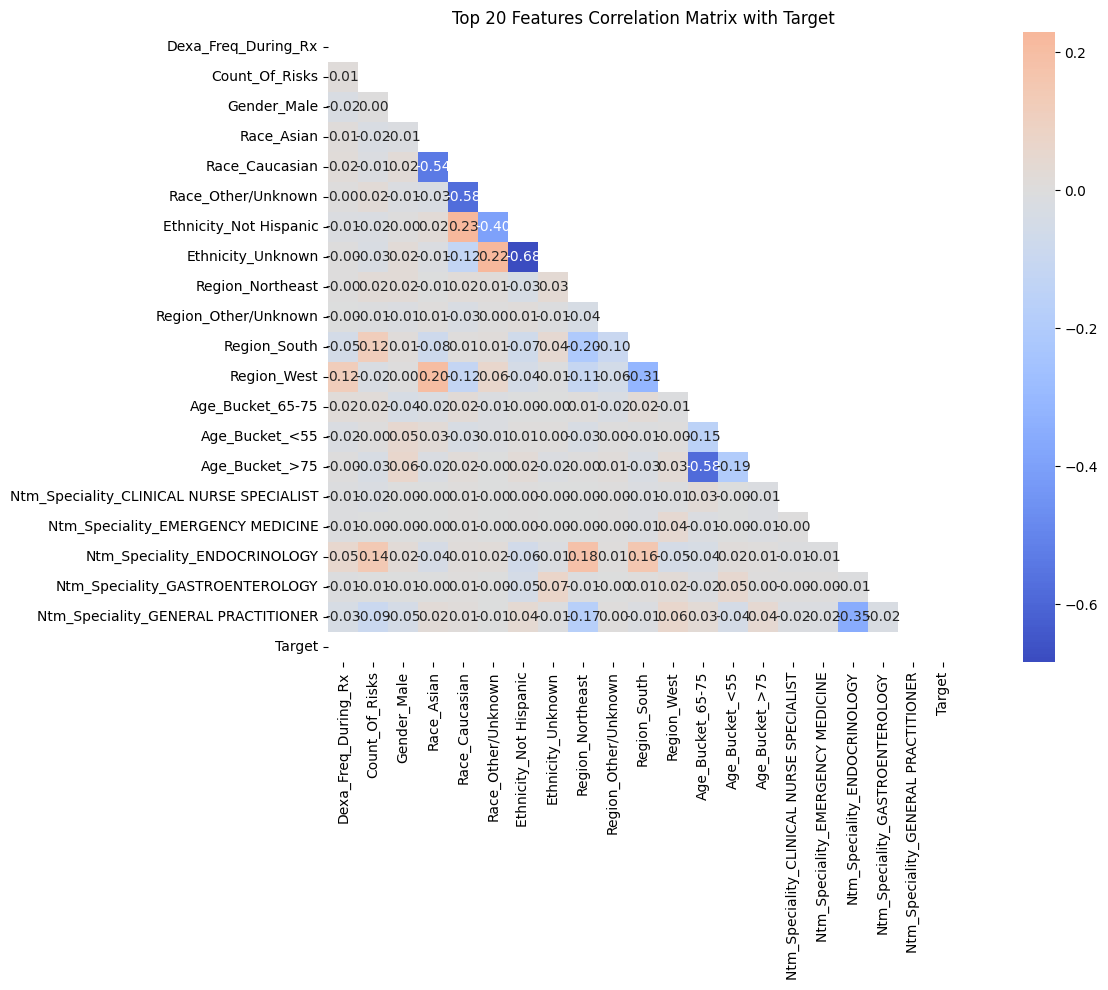

In [ ]:
# 8. Correlation Analysis and Feature Importance
# Convert target to numeric for correlation analysis
y_numeric = y.map({'Persistent': 1, 'Non-Persistent': 0})

# Select only numeric columns for correlation analysis
numeric_features = X.select_dtypes(include=[np.number])
print(f"Analyzing correlations for {len(numeric_features.columns)} numeric features")

# Calculate correlation with target variable
target_correlations = numeric_features.corrwith(y_numeric)
target_correlations = target_correlations.abs().sort_values(ascending=False)

print("Top 10 features correlated with target:")
print(target_correlations.head(10))

# Visualize correlation matrix (subset of features for readability)
plt.figure(figsize=(15, 10))
top_features = target_correlations.head(20).index.tolist()
subset_data = numeric_features[top_features]
subset_data['Target'] = y_numeric

correlation_matrix = subset_data.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', center=0, 
            fmt='.2f', square=True)
plt.title('Top 20 Features Correlation Matrix with Target')
plt.tight_layout()
plt.show()

In [ ]:
# 9. Data Quality Summary
print("=== DATA CLEANING & FEATURE ENGINEERING SUMMARY ===")
print(f"Original dataset shape: {df.shape}")
print(f"Final processed dataset shape: {df_final.shape}")
print(f"Number of features: {X.shape[1]}")
print(f"Number of samples: {X.shape[0]}")

print(f"\nData Quality Checks:")
print(f"- Missing values: {df_final.isnull().sum().sum()}")
print(f"- Duplicate rows: {df_final.duplicated().sum()}")
print(f"- Infinite values: {np.isinf(df_final.select_dtypes(include=[np.number])).sum().sum()}")

print(f"\nFeature Engineering Summary:")
print(f"- Categorical variables encoded using OneHot Encoder")
print(f"- New features created: Risk scores, Interaction features")
print(f"- Features scaled: {len(numerical_cols_for_scaling)}")

print(f"\nDataset is ready for machine learning modeling!")

=== DATA CLEANING & FEATURE ENGINEERING SUMMARY ===
Original dataset shape: (3424, 68)
Final processed dataset shape: (3424, 141)
Number of features: 140
Number of samples: 3424

Data Quality Checks:
- Missing values: 10272
- Duplicate rows: 6
- Infinite values: 0

Feature Engineering Summary:
- Categorical variables encoded using OneHot Encoder
- New features created: Risk scores, Interaction features
- Features scaled: 139

Dataset is ready for machine learning modeling!
